In [1]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Statistics
using JSON
using StatsPlots

In [2]:
paths = Dict(
    "discrete" => Dict(
        "4_100" => ("exp1_discrete_4_100_2025-05-22_19-55-13", 50),
        "4_1000" => ("exp1_discrete_4_1000_2025-05-22_19-19-35", 50),
        "10_100" => ("exp1_discrete_10_100_2025-05-22_19-55-00", 50),
        "10_1000" => ("exp1_discrete_10_1000_2025-05-22_19-32-17", 50),
        "30_100" => ("exp1_discrete_30_100_2025-05-22_19-54-55", 50),
        "30_1000" => ("exp1_discrete_30_1000_2025-05-22_19-45-28", 50),
    ),
    "plus" => Dict(
        "4_100" => ("exp1_plus_4_100_2025-05-23_12-17-45", 50),
        "4_1000" => ("exp1_plus_4_1000_2025-05-23_13-12-37", 50),
        "10_100" => ("exp1_plus_10_100_2025-05-23_13-13-08", 50),
        "10_1000" => ("exp1_plus_10_1000_2025-05-23_13-12-51", 50),
        "30_100" => ("exp1_plus_30_100_2025-05-23_13-13-15", 50),
        "30_1000" => ("exp1_plus_30_1000_2025-05-23_13-13-28", 50),
    ),
    "goal" => Dict(
        "4_100" => ("exp1_goal_4_100_2025-05-24_10-58-48", 50),
        "4_1000" => ("exp1_goal_4_1000_2025-05-24_11-01-42", 50),
        "10_100" => ("exp1_goal_10_100_2025-05-24_11-00-59", 50),
        "10_1000" => ("exp1_goal_10_1000_2025-05-24_11-01-22", 50),
        "30_100" => ("exp1_goal_30_100_2025-05-24_11-01-05", 50),
        "30_1000" => ("exp1_goal_30_1000_2025-05-24_11-01-15", 50),
    ),
    "hybrid" => Dict(
        "4_100" => ("exp1_hybrid_4_100_2025-05-27_19-10-18", 50),
        "4_1000" => ("exp1_hybrid_4_1000_2025-05-27_19-10-25", 50),
        "10_100" => ("exp1_hybrid_10_100_2025-05-27_19-10-49", 50),
        "10_1000" => ("exp1_hybrid_10_1000_2025-05-27_19-10-37", 50),
        "30_100" => ("exp1_hybrid_30_100_2025-05-27_19-11-01", 50),
        "30_1000" => ("exp1_hybrid_30_1000_2025-05-27_19-11-08", 45),
    ),
    "fuzzy" => Dict(
        "4_100" => ("exp1_fuzzy_4_100_2025-05-27_22-05-01", 50),
        "4_1000" => ("exp1_fuzzy_4_1000_2025-05-27_22-04-43", 8),
        "10_100" => ("exp1_fuzzy_10_100_2025-05-27_22-04-11", 38),
        "10_1000" => ("exp1_fuzzy_10_1000_2025-05-27_22-04-35", 2),
        "30_100" => ("exp1_fuzzy_30_100_2025-05-27_22-03-46", 50),
        "30_1000" => ("exp1_fuzzy_30_1000_2025-05-27_22-03-38", 16),
    )
)

Dict{String, Dict{String, Tuple{String, Int64}}} with 5 entries:
  "plus"     => Dict("10_100"=>("exp1_plus_10_100_2025-05-23_13-13-08", 50), "4…
  "hybrid"   => Dict("10_100"=>("exp1_hybrid_10_100_2025-05-27_19-10-49", 50), …
  "goal"     => Dict("10_100"=>("exp1_goal_10_100_2025-05-24_11-00-59", 50), "4…
  "fuzzy"    => Dict("10_100"=>("exp1_fuzzy_10_100_2025-05-27_22-04-11", 38), "…
  "discrete" => Dict("10_100"=>("exp1_discrete_10_100_2025-05-22_19-55-00", 50)…

In [3]:
function laod_data_model_dataset(model,dataset)
    path, iter = paths[model][dataset]
    path = "exps/" * path
    acc = zeros(iter)
    complete_time = zeros(iter)
    for i in 1:iter
        json_data = JSON.parsefile("$(path)/params_$i.json")
        acc[i] = json_data["accuracy"]
        complete_time[i] = json_data["complete_time"]
    end
    return acc, complete_time
end

laod_data_model_dataset (generic function with 1 method)

In [4]:
function load_data(dataset)
    return Dict(
        "discrete" => laod_data_model_dataset("discrete",dataset),
        "plus" => laod_data_model_dataset("plus",dataset),
        "fuzzy" => laod_data_model_dataset("fuzzy",dataset),
        "goal" => laod_data_model_dataset("goal",dataset),
        "hybrid" => laod_data_model_dataset("hybrid",dataset),
    )
end

load_data (generic function with 1 method)

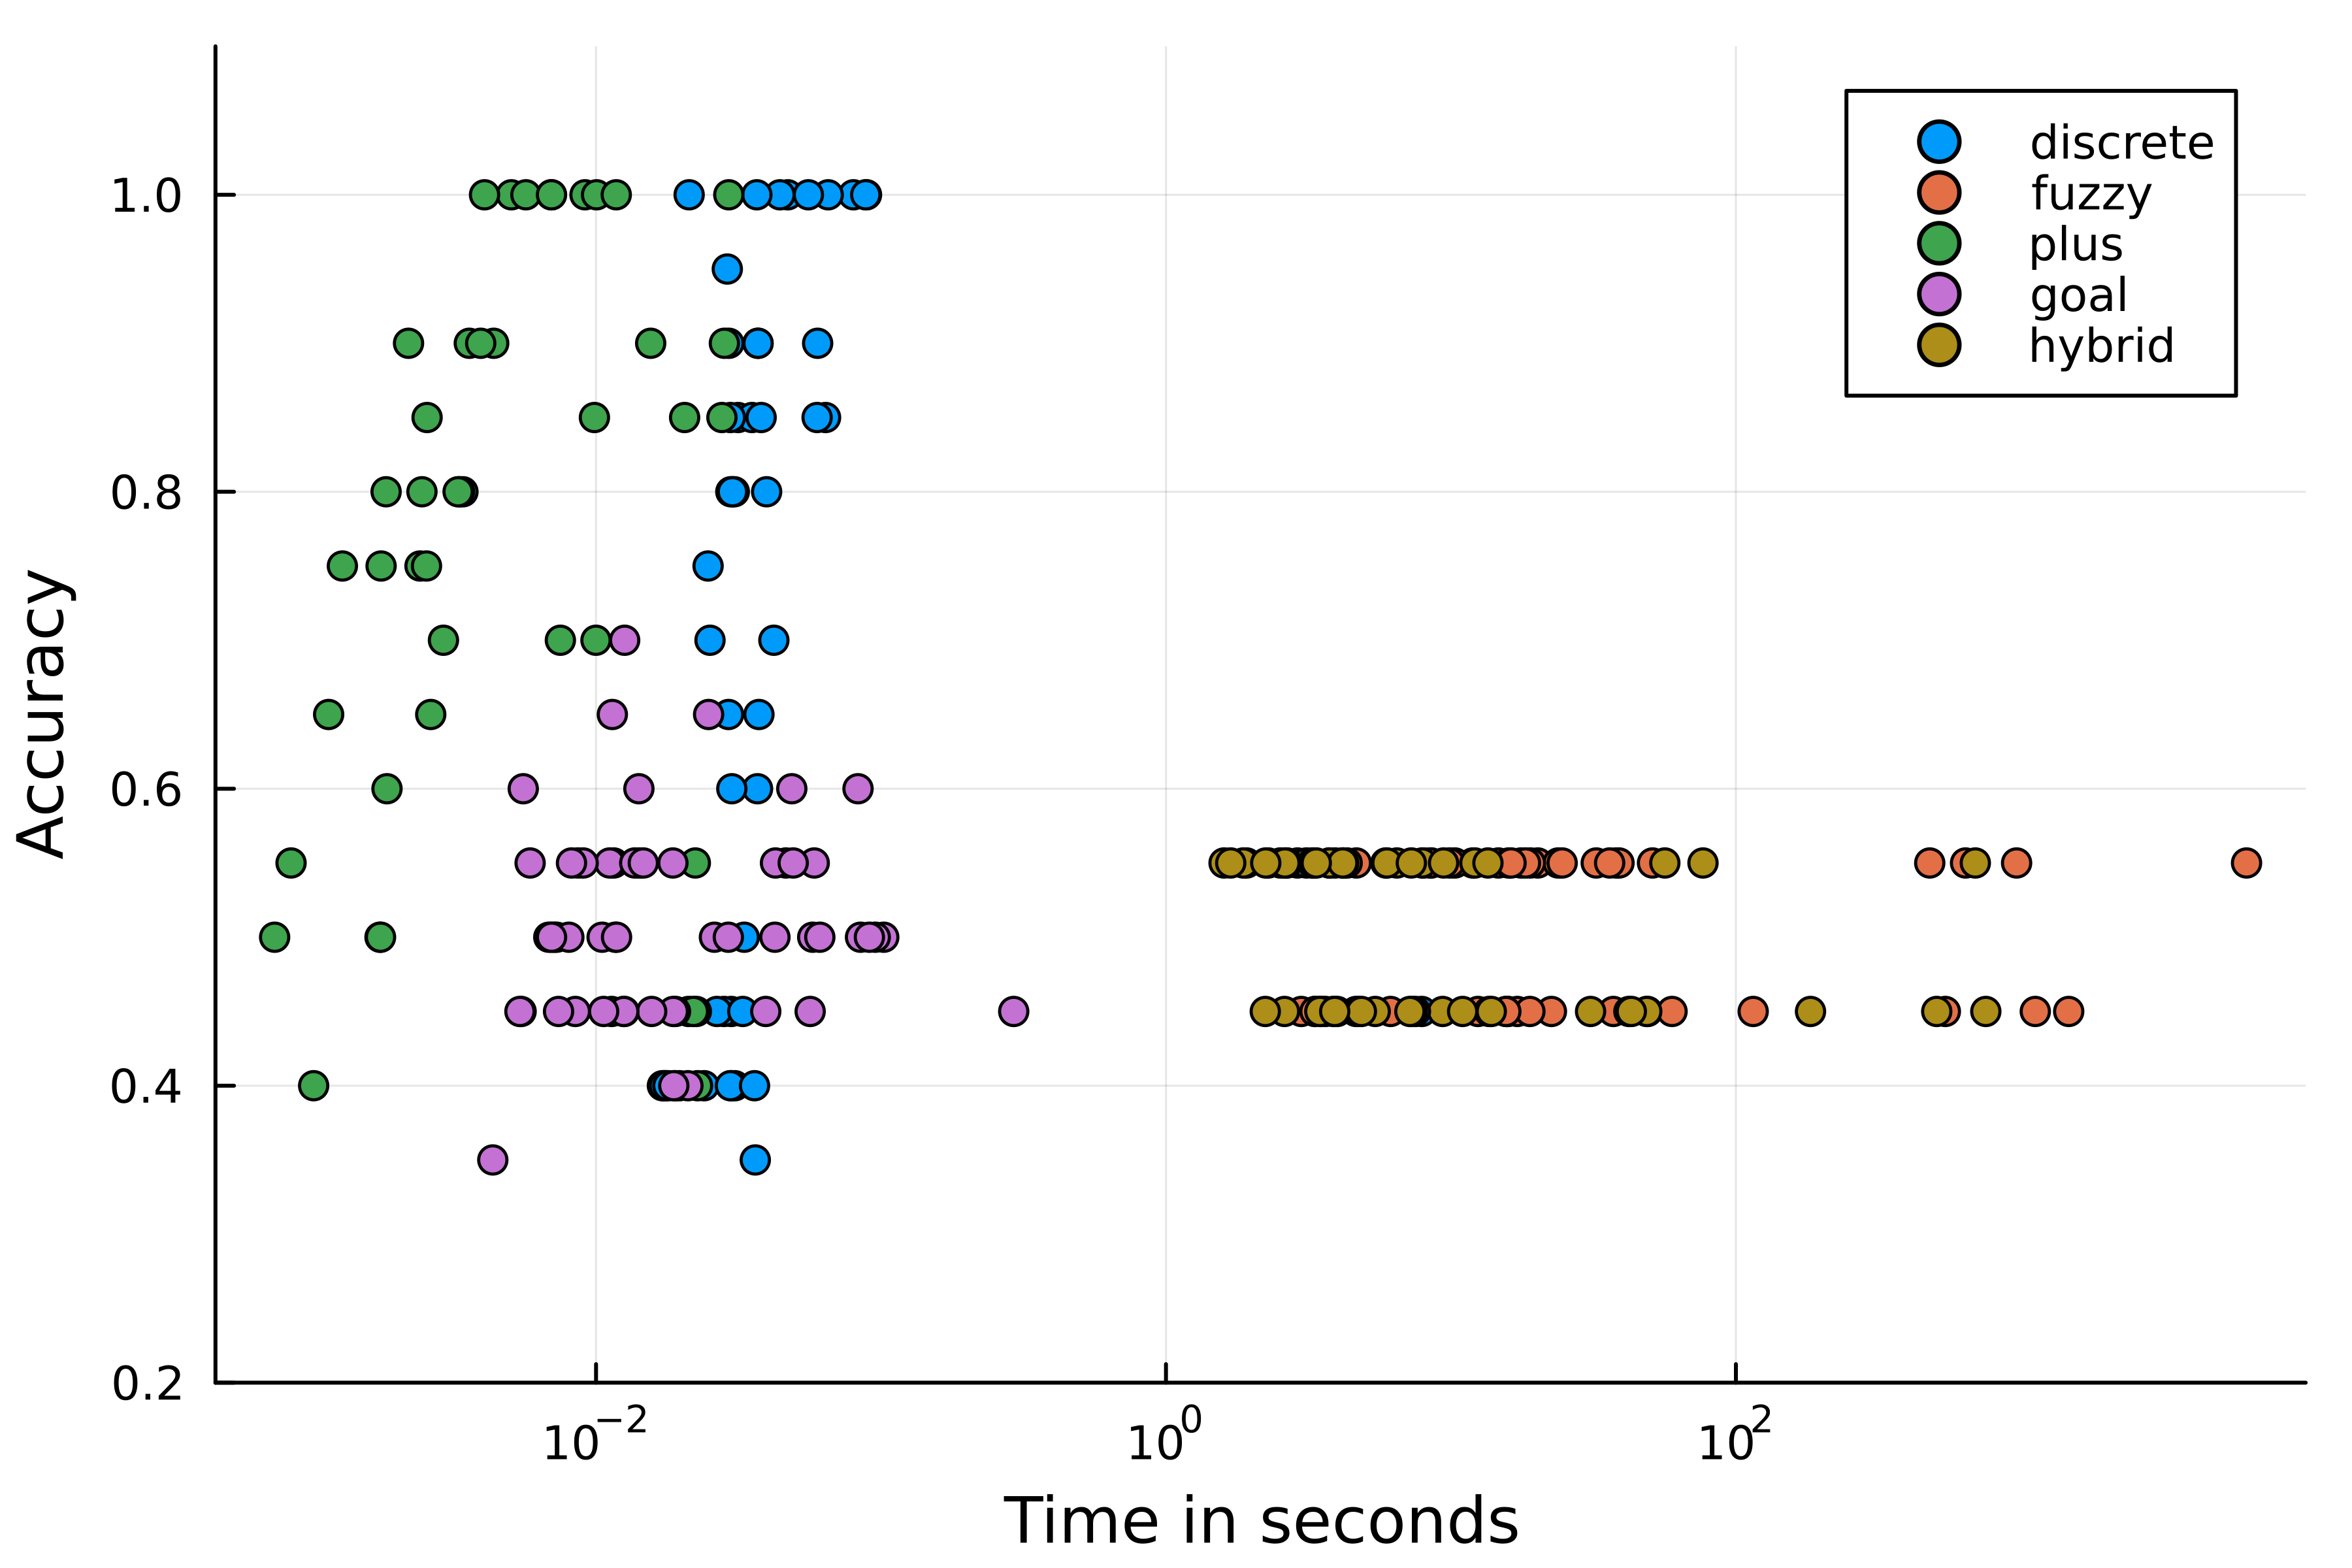

In [5]:
data = load_data("4_100")
p = scatter(data["discrete"][2],data["discrete"][1],label="discrete",xlabel="Time in seconds",ylabel="Accuracy",ylim=(0.2,1.1),xaxis= :log,dpi=600)
scatter!(data["fuzzy"][2],data["fuzzy"][1],label="fuzzy")
scatter!(data["plus"][2],data["plus"][1],label="plus")
scatter!(data["goal"][2],data["goal"][1],label="goal")
scatter!(data["hybrid"][2],data["hybrid"][1],label="hybrid")
savefig(p,"plots/synth_4_100.png")
p

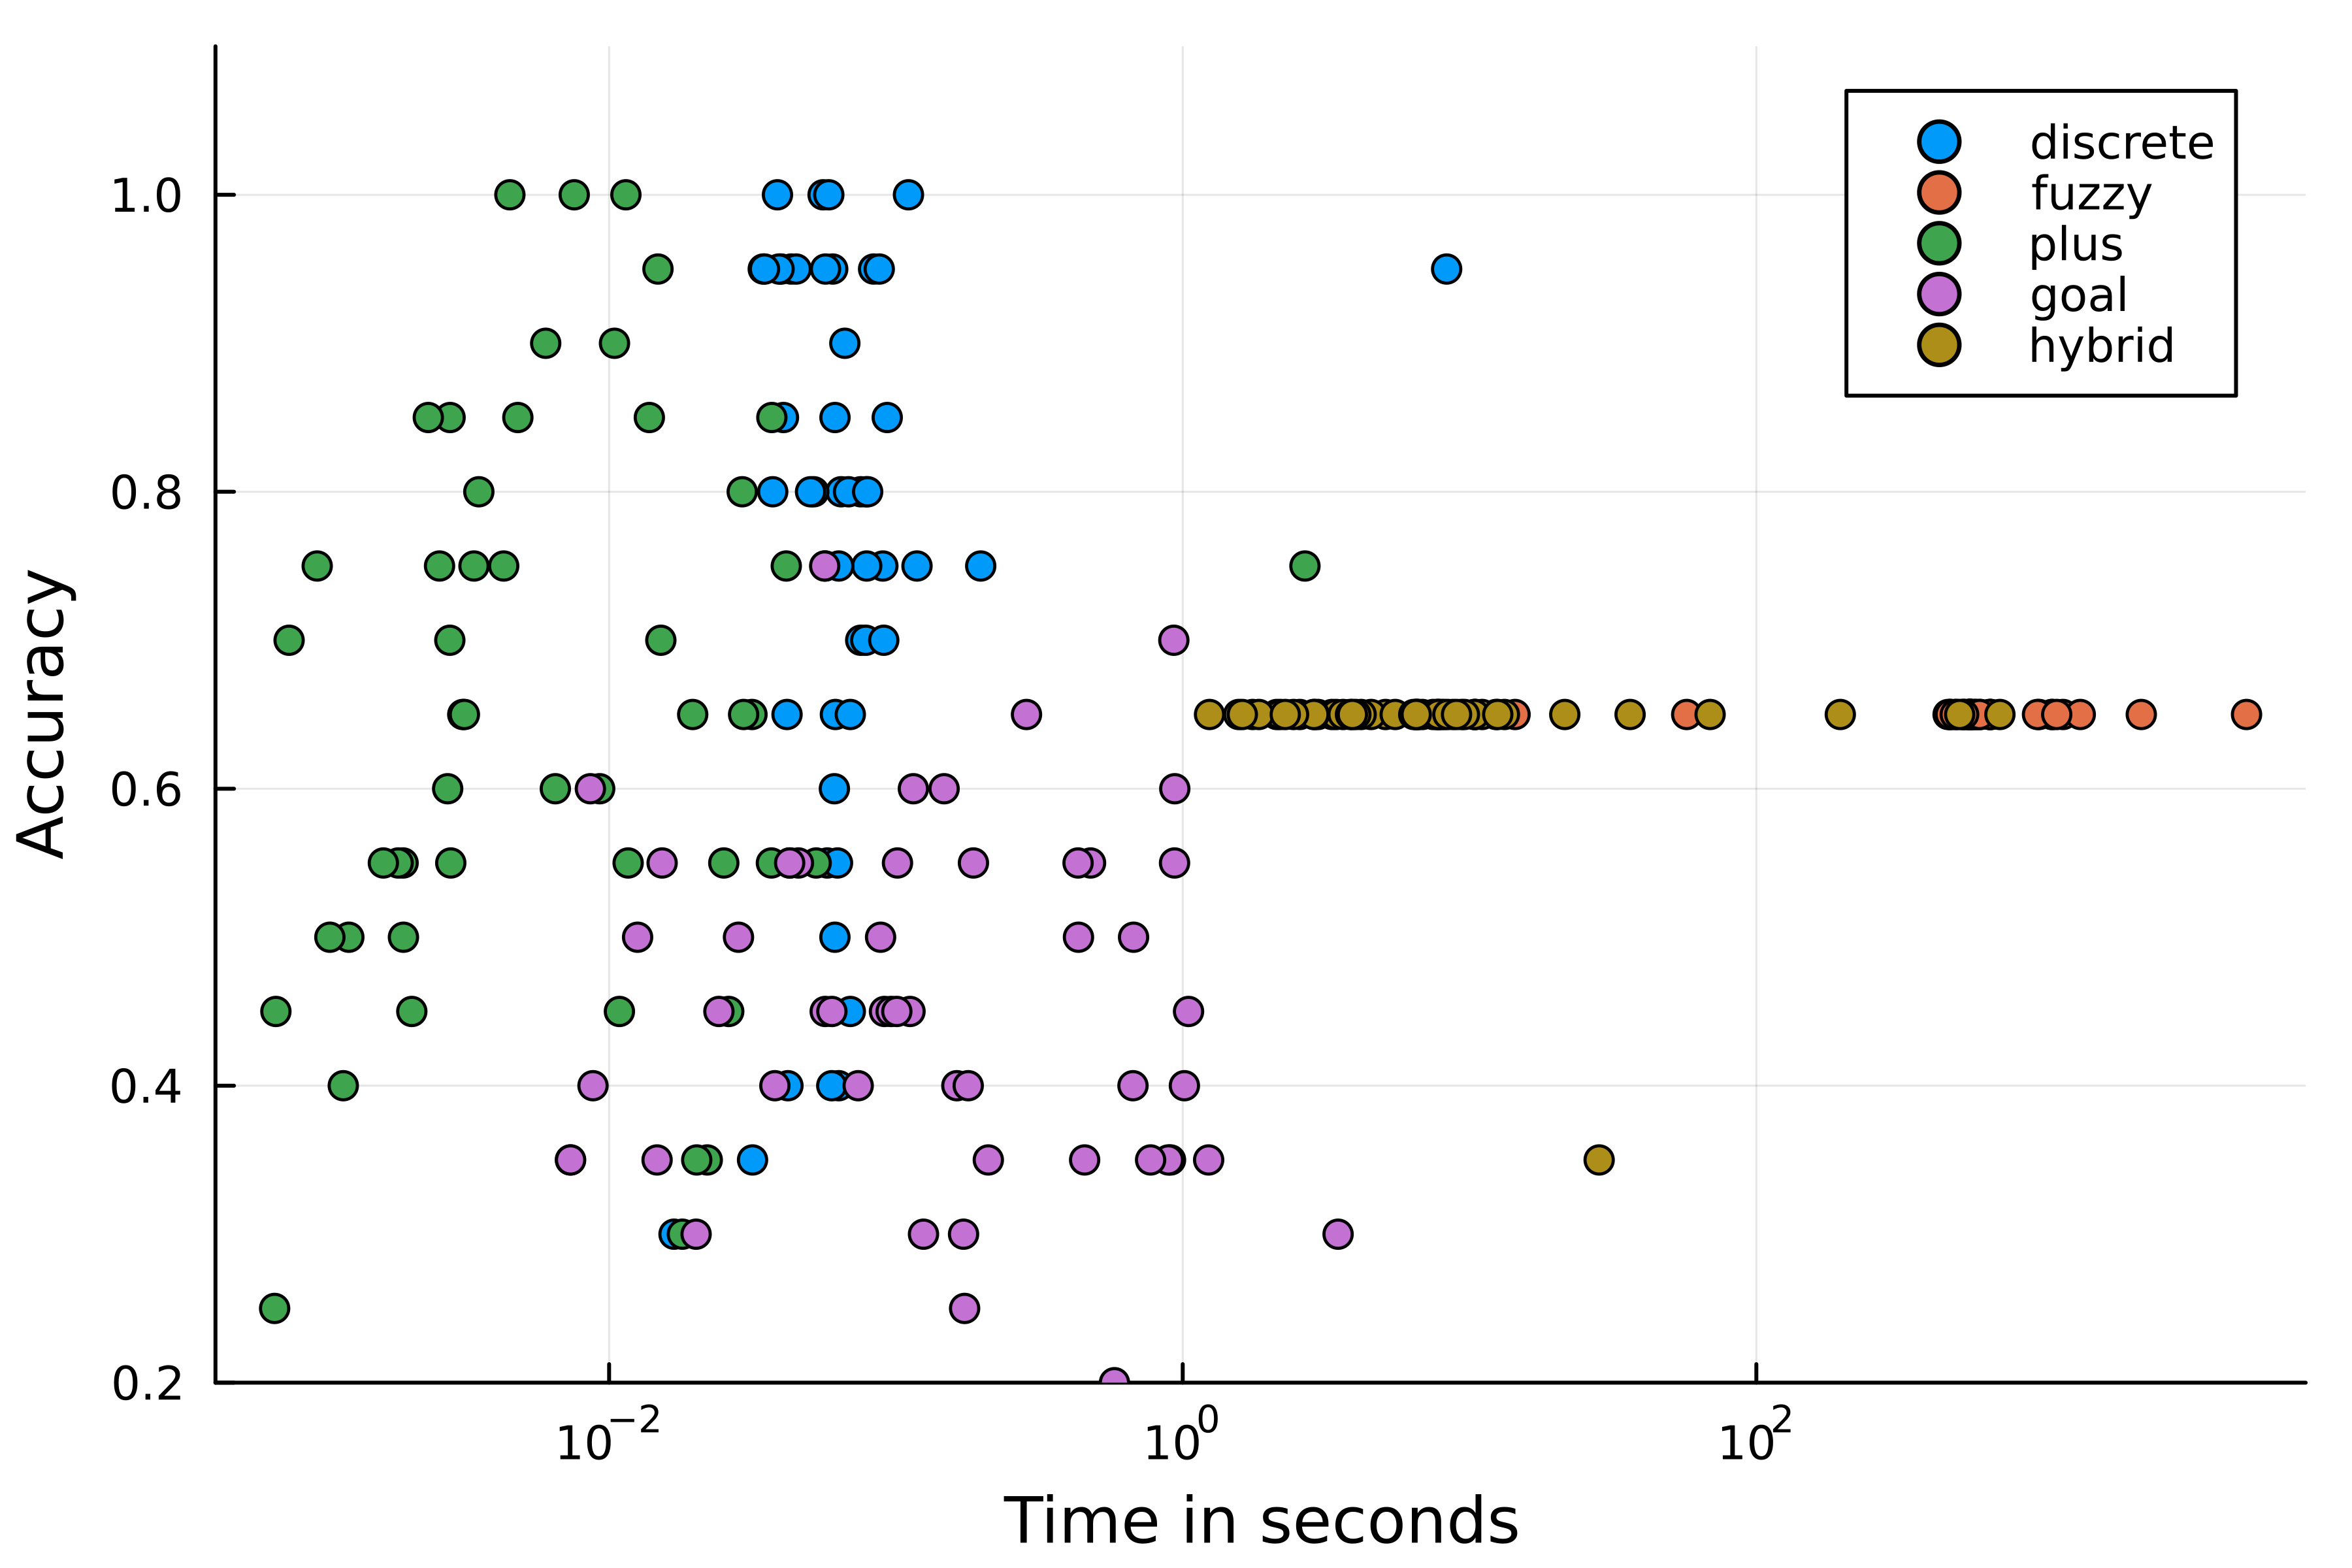

In [6]:
data = load_data("10_100")
p = scatter(data["discrete"][2],data["discrete"][1],label="discrete",xlabel="Time in seconds",ylabel="Accuracy",ylim=(0.2,1.1),xaxis= :log,dpi=600)
scatter!(data["fuzzy"][2],data["fuzzy"][1],label="fuzzy")
scatter!(data["plus"][2],data["plus"][1],label="plus")
scatter!(data["goal"][2],data["goal"][1],label="goal")
scatter!(data["hybrid"][2],data["hybrid"][1],label="hybrid")
savefig(p,"plots/synth_10_100.png")
p

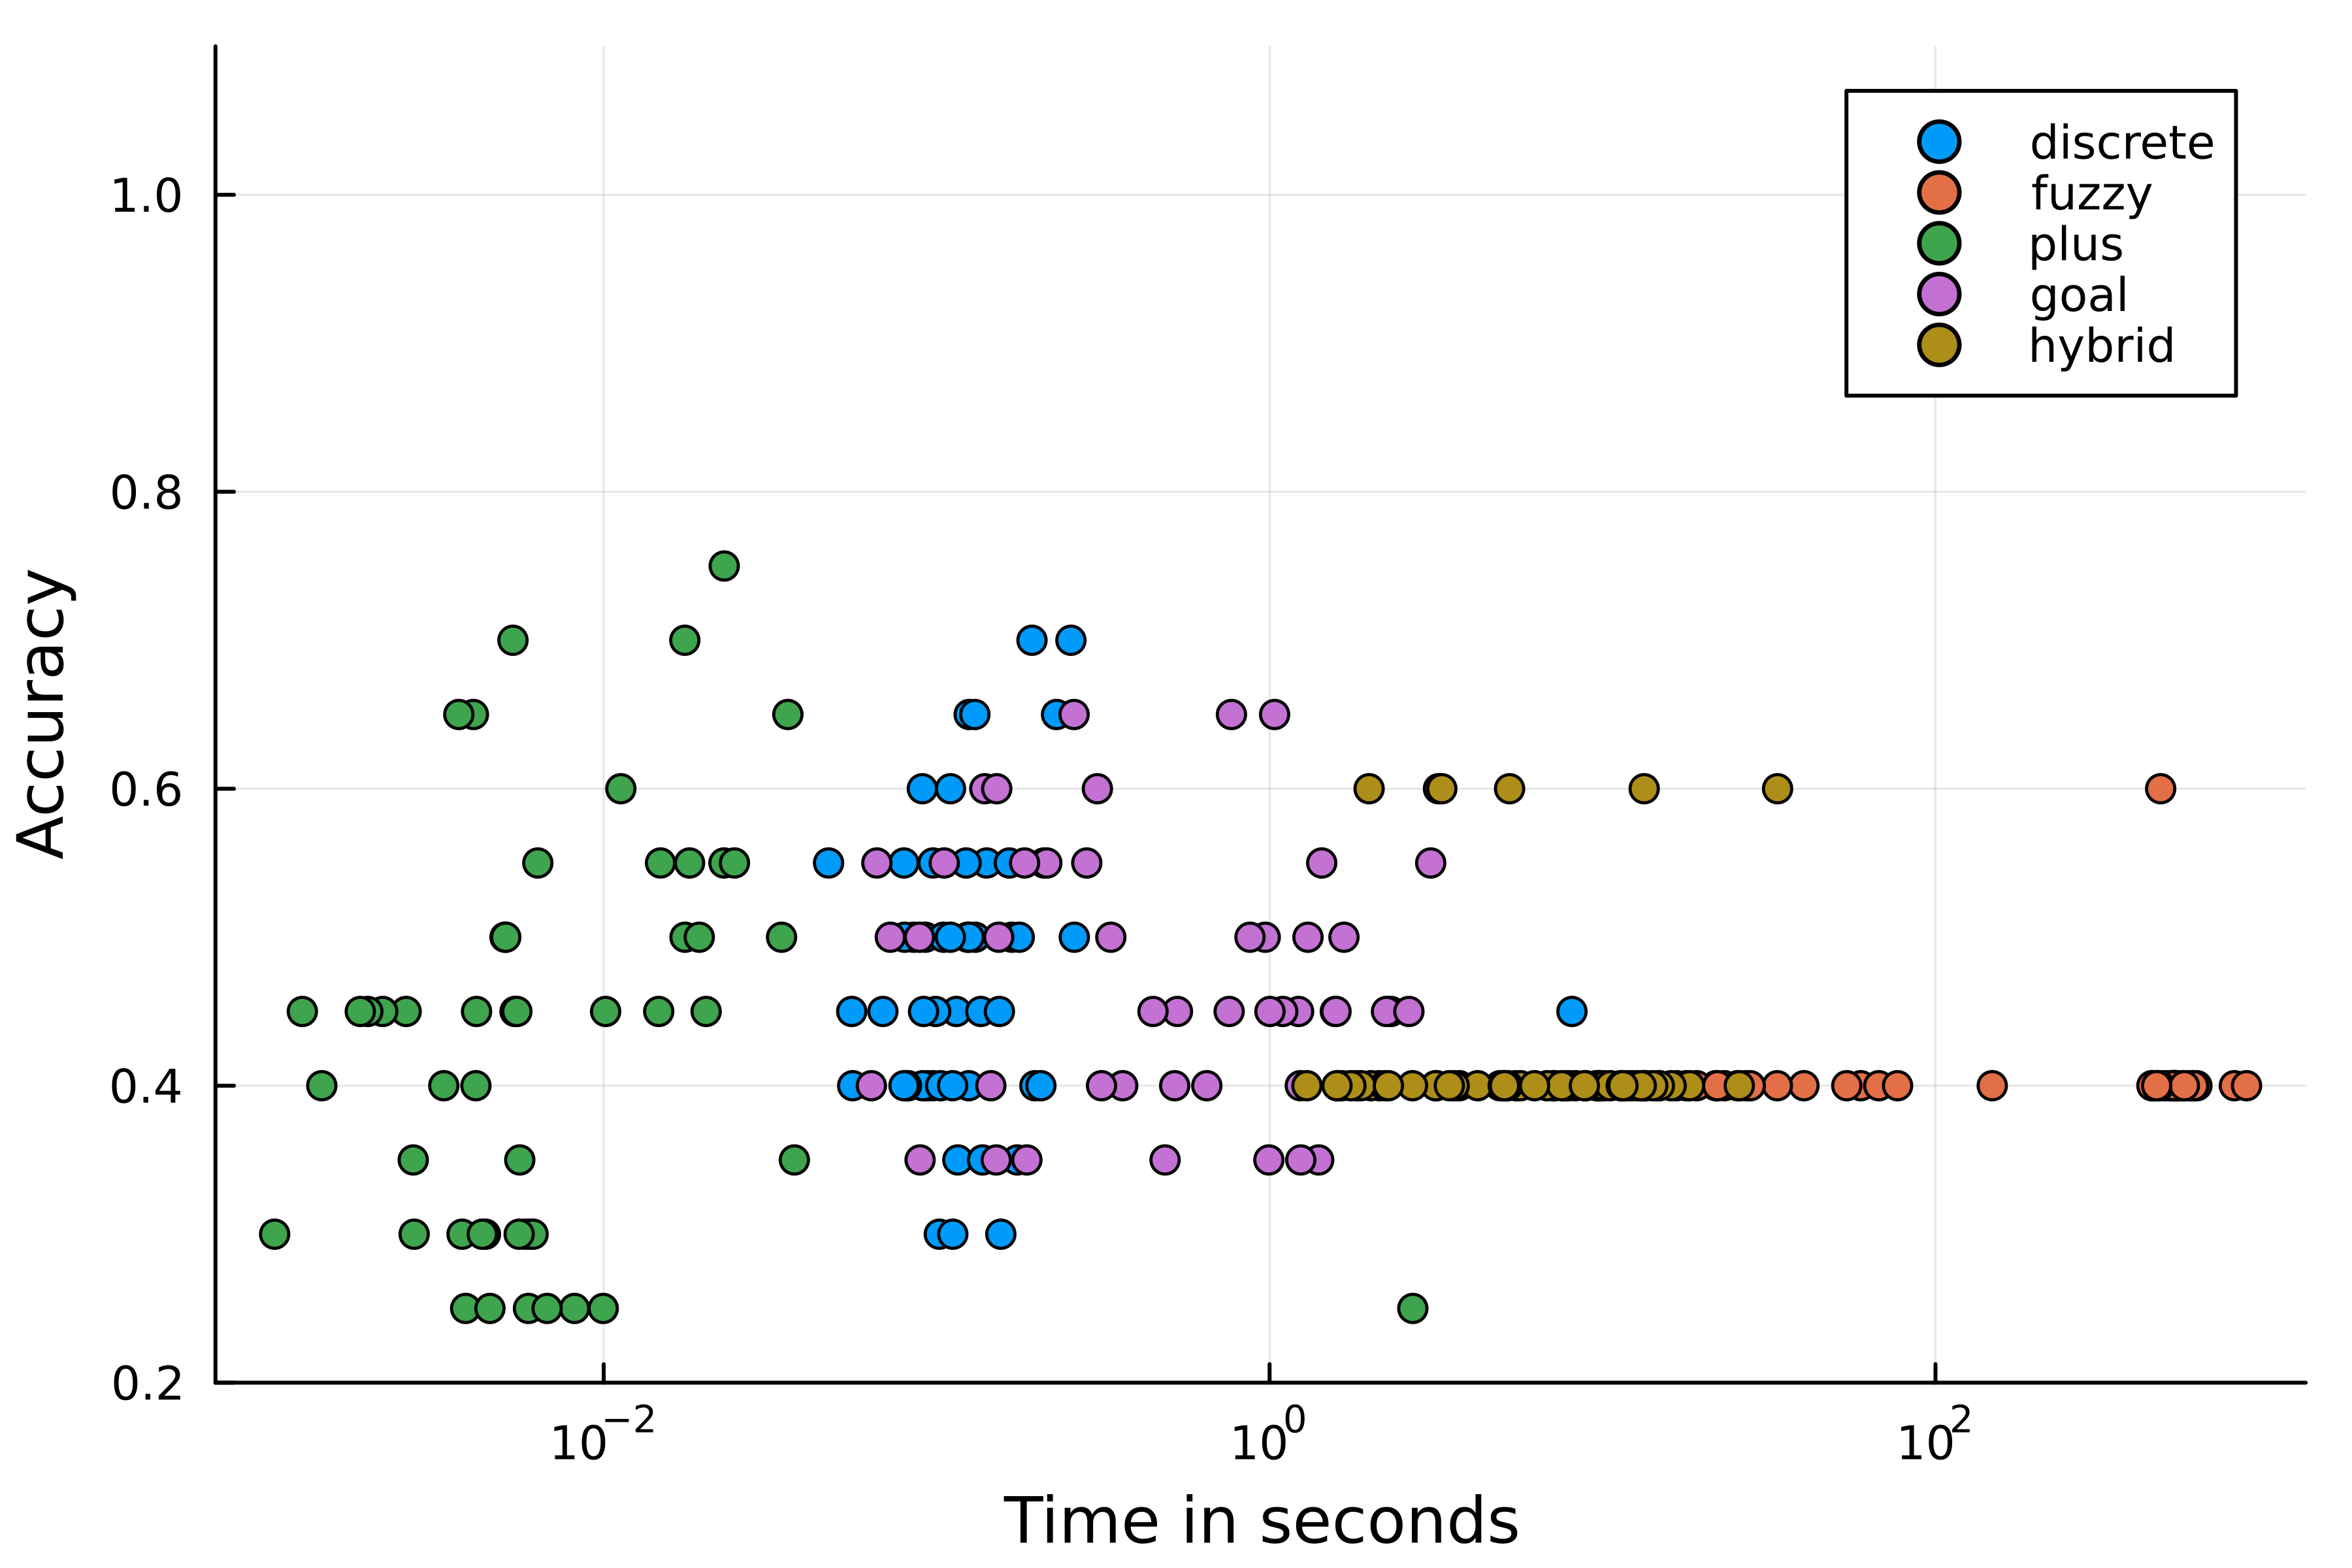

In [7]:
data = load_data("30_100")
p = scatter(data["discrete"][2],data["discrete"][1],label="discrete",xlabel="Time in seconds",ylabel="Accuracy",ylim=(0.2,1.1),xaxis= :log,dpi=600)
scatter!(data["fuzzy"][2],data["fuzzy"][1],label="fuzzy")
scatter!(data["plus"][2],data["plus"][1],label="plus")
scatter!(data["goal"][2],data["goal"][1],label="goal")
scatter!(data["hybrid"][2],data["hybrid"][1],label="hybrid")
savefig(p,"plots/synth_30_100.png")
p

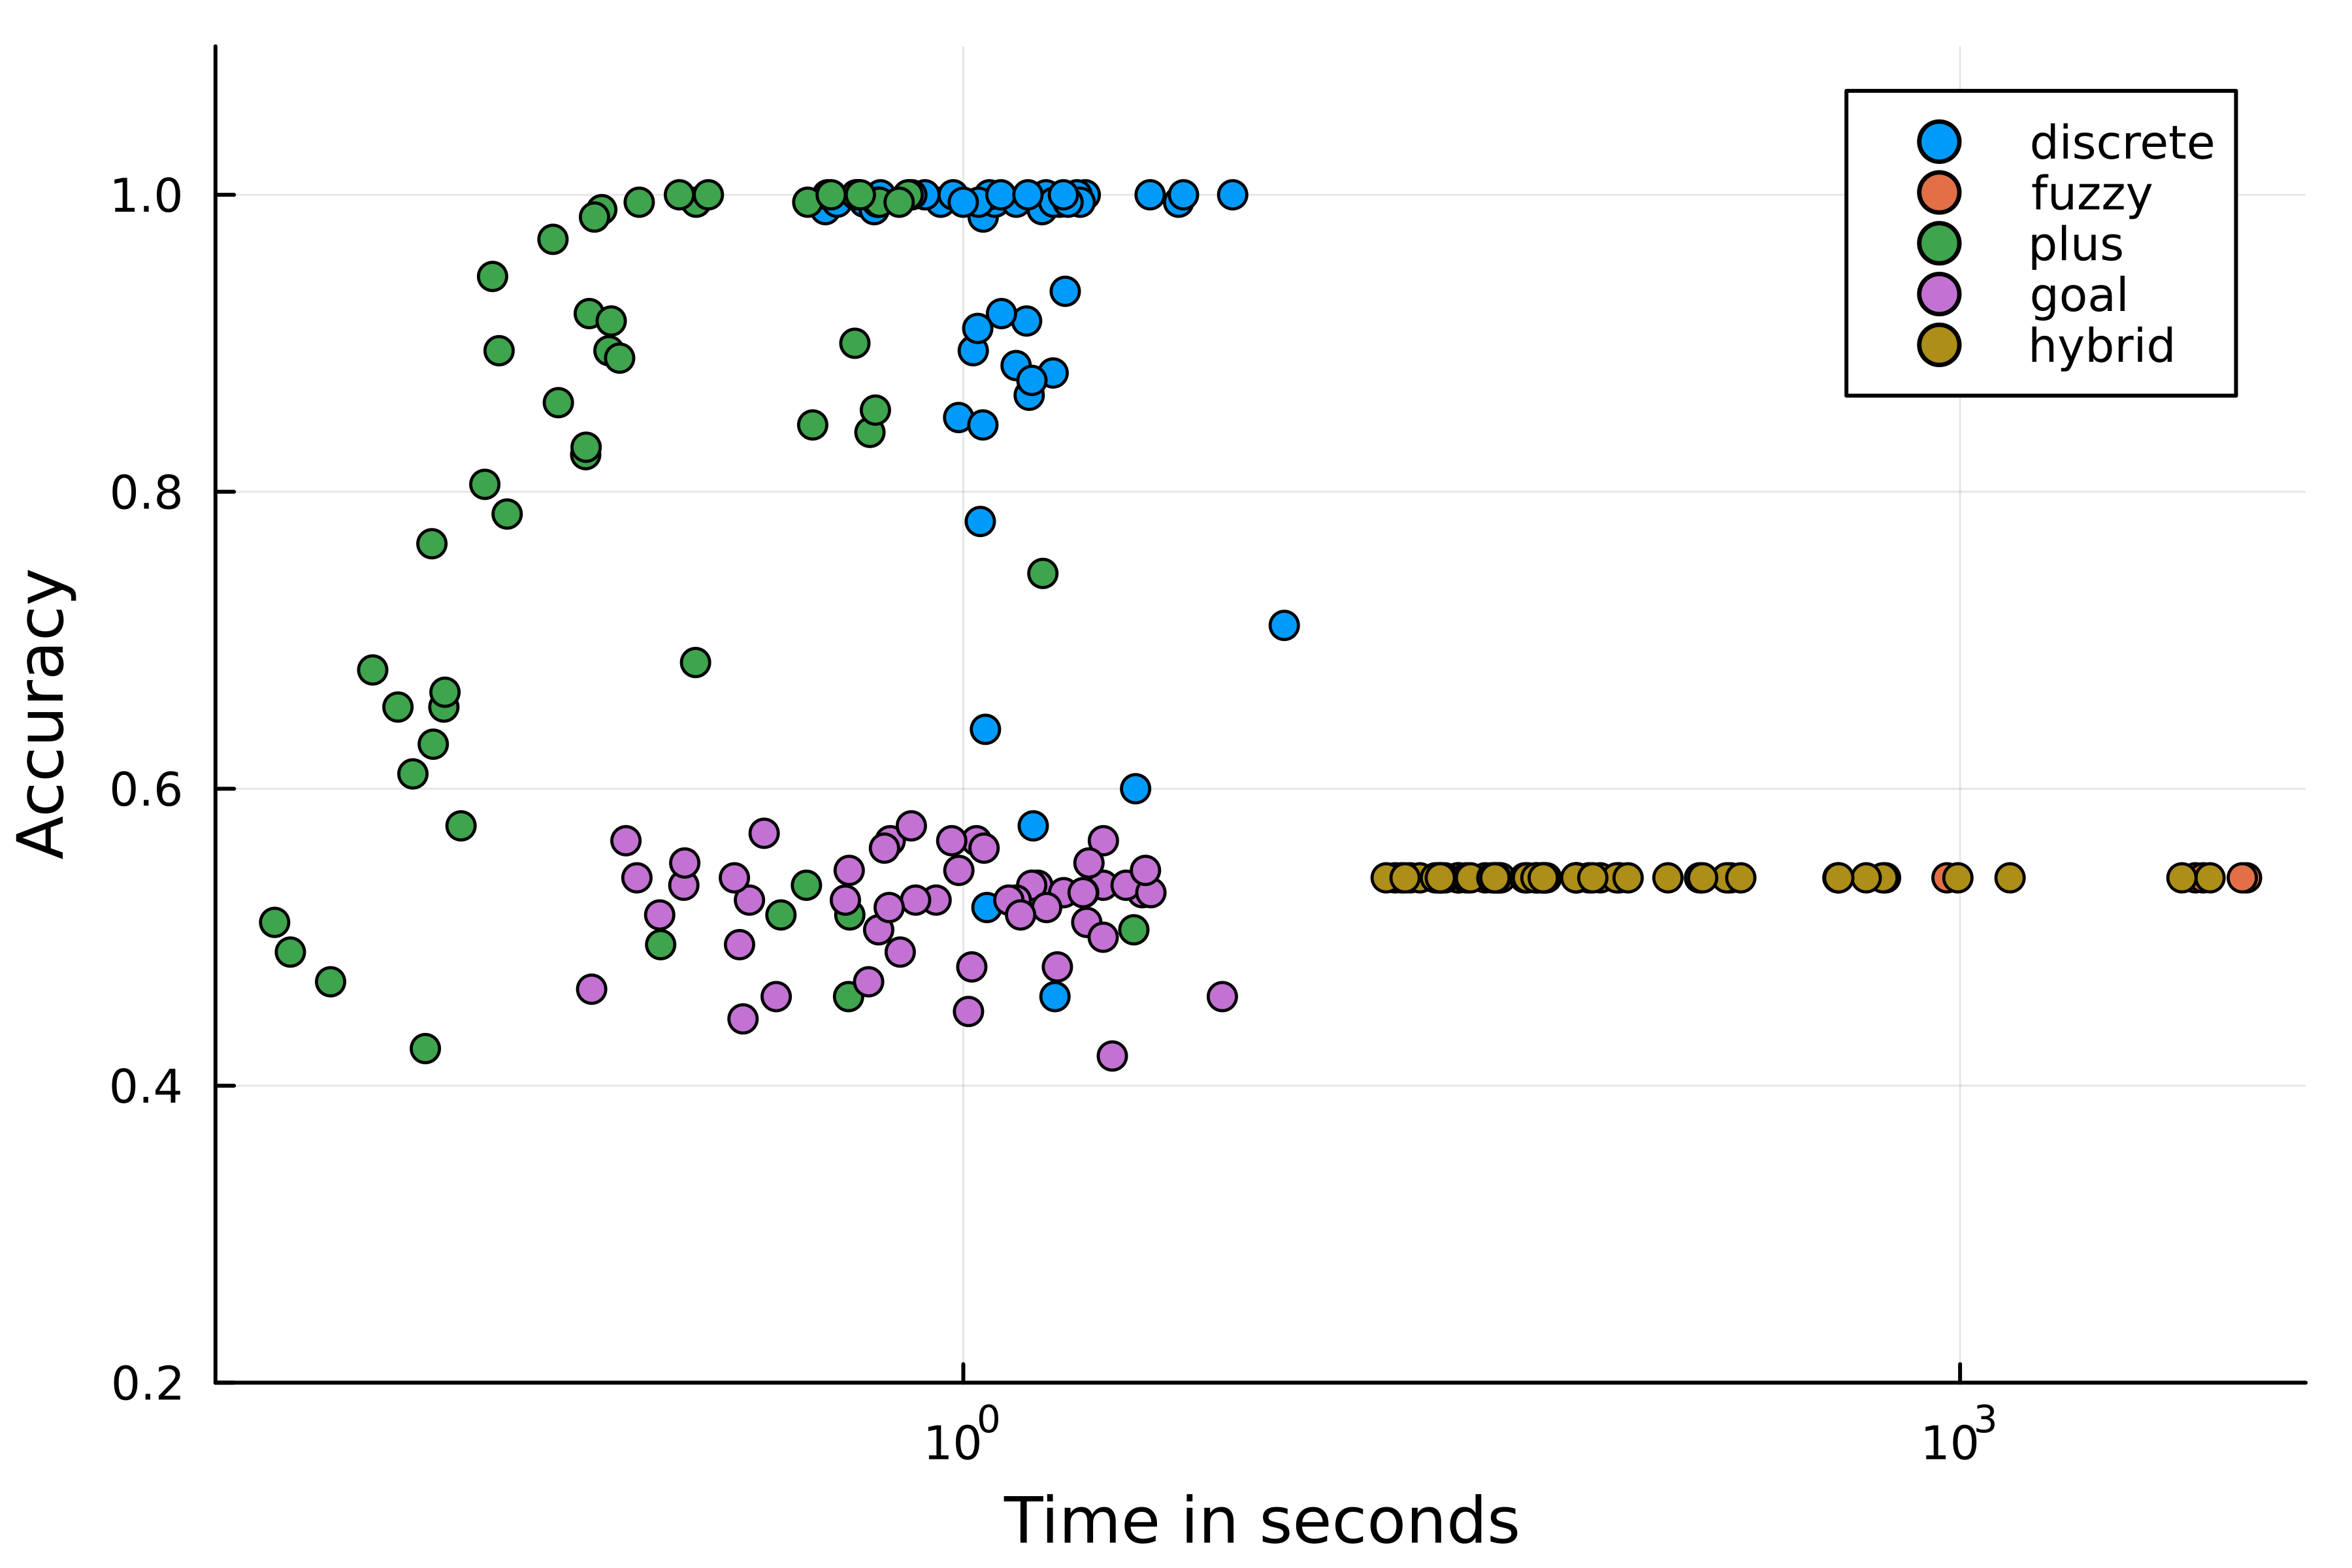

In [8]:
data = load_data("4_1000")
p = scatter(data["discrete"][2],data["discrete"][1],label="discrete",xlabel="Time in seconds",ylabel="Accuracy",ylim=(0.2,1.1),xaxis= :log,dpi=600)
scatter!(data["fuzzy"][2],data["fuzzy"][1],label="fuzzy")
scatter!(data["plus"][2],data["plus"][1],label="plus")
scatter!(data["goal"][2],data["goal"][1],label="goal")
scatter!(data["hybrid"][2],data["hybrid"][1],label="hybrid")
savefig(p,"plots/synth_4_1000.png")
p

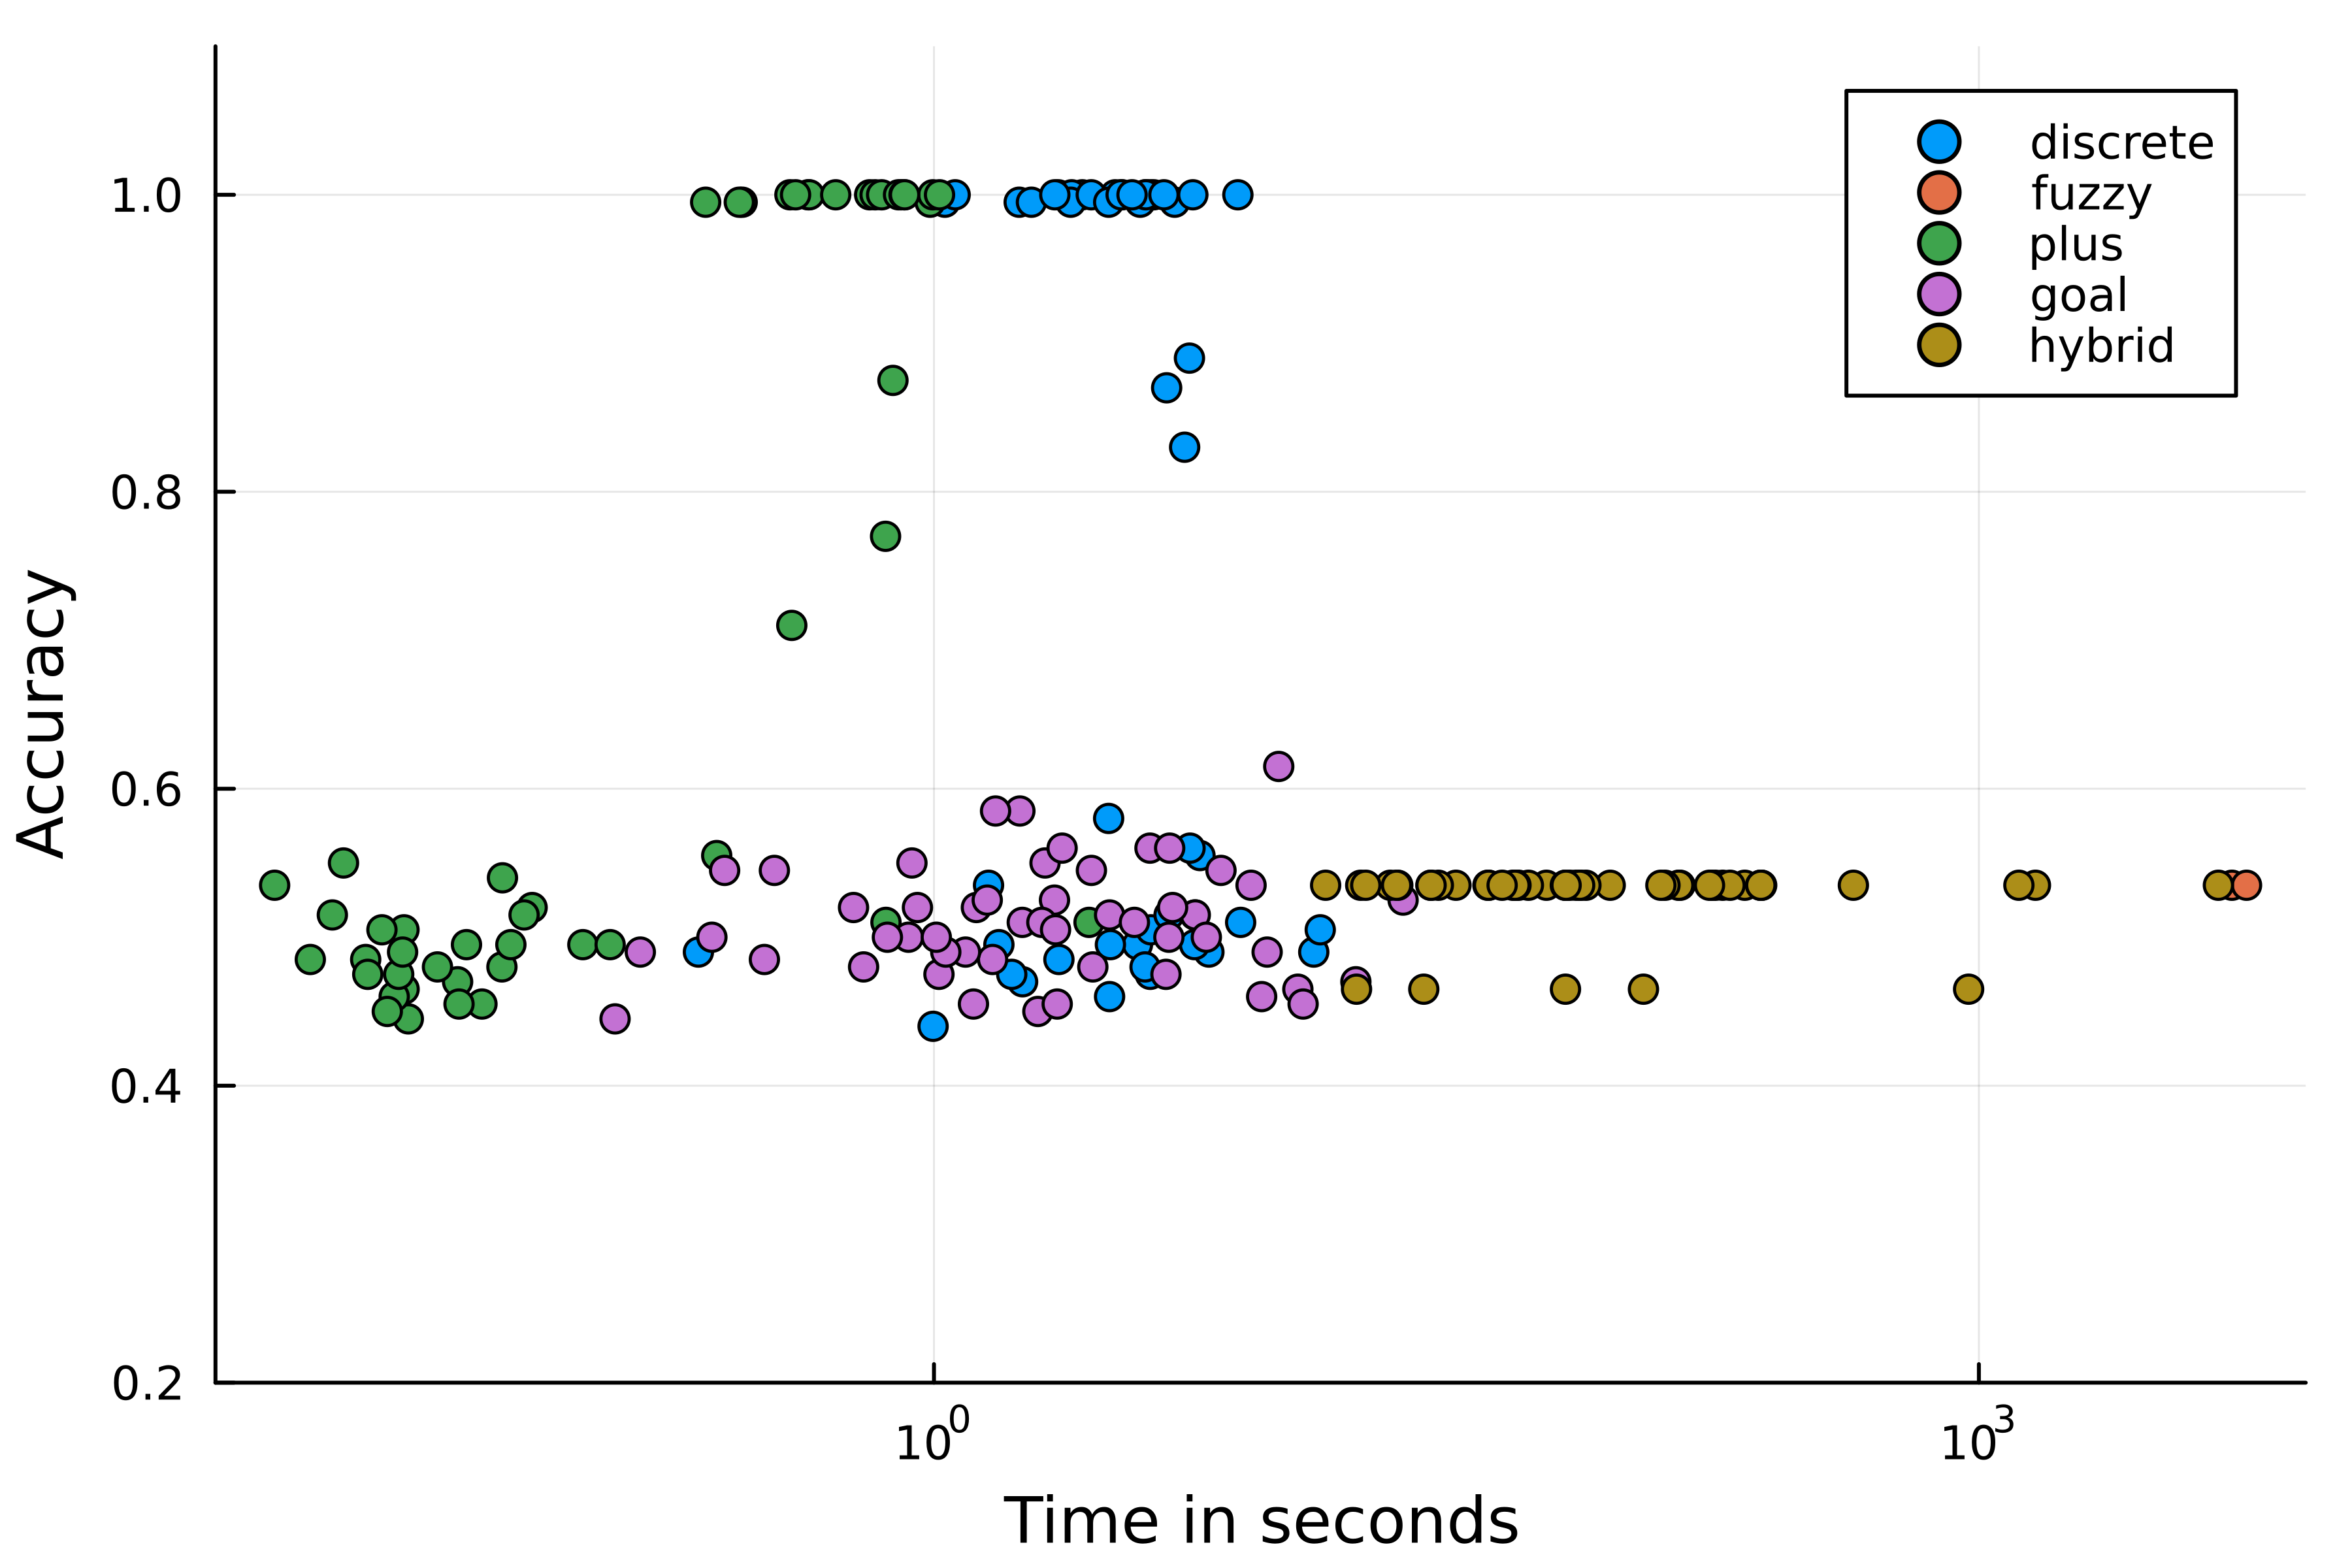

In [9]:
data = load_data("10_1000")
p = scatter(data["discrete"][2],data["discrete"][1],label="discrete",xlabel="Time in seconds",ylabel="Accuracy",ylim=(0.2,1.1),xaxis= :log,dpi=600)
scatter!(data["fuzzy"][2],data["fuzzy"][1],label="fuzzy")
scatter!(data["plus"][2],data["plus"][1],label="plus")
scatter!(data["goal"][2],data["goal"][1],label="goal")
scatter!(data["hybrid"][2],data["hybrid"][1],label="hybrid")
savefig(p,"plots/synth_10_1000.png")
p

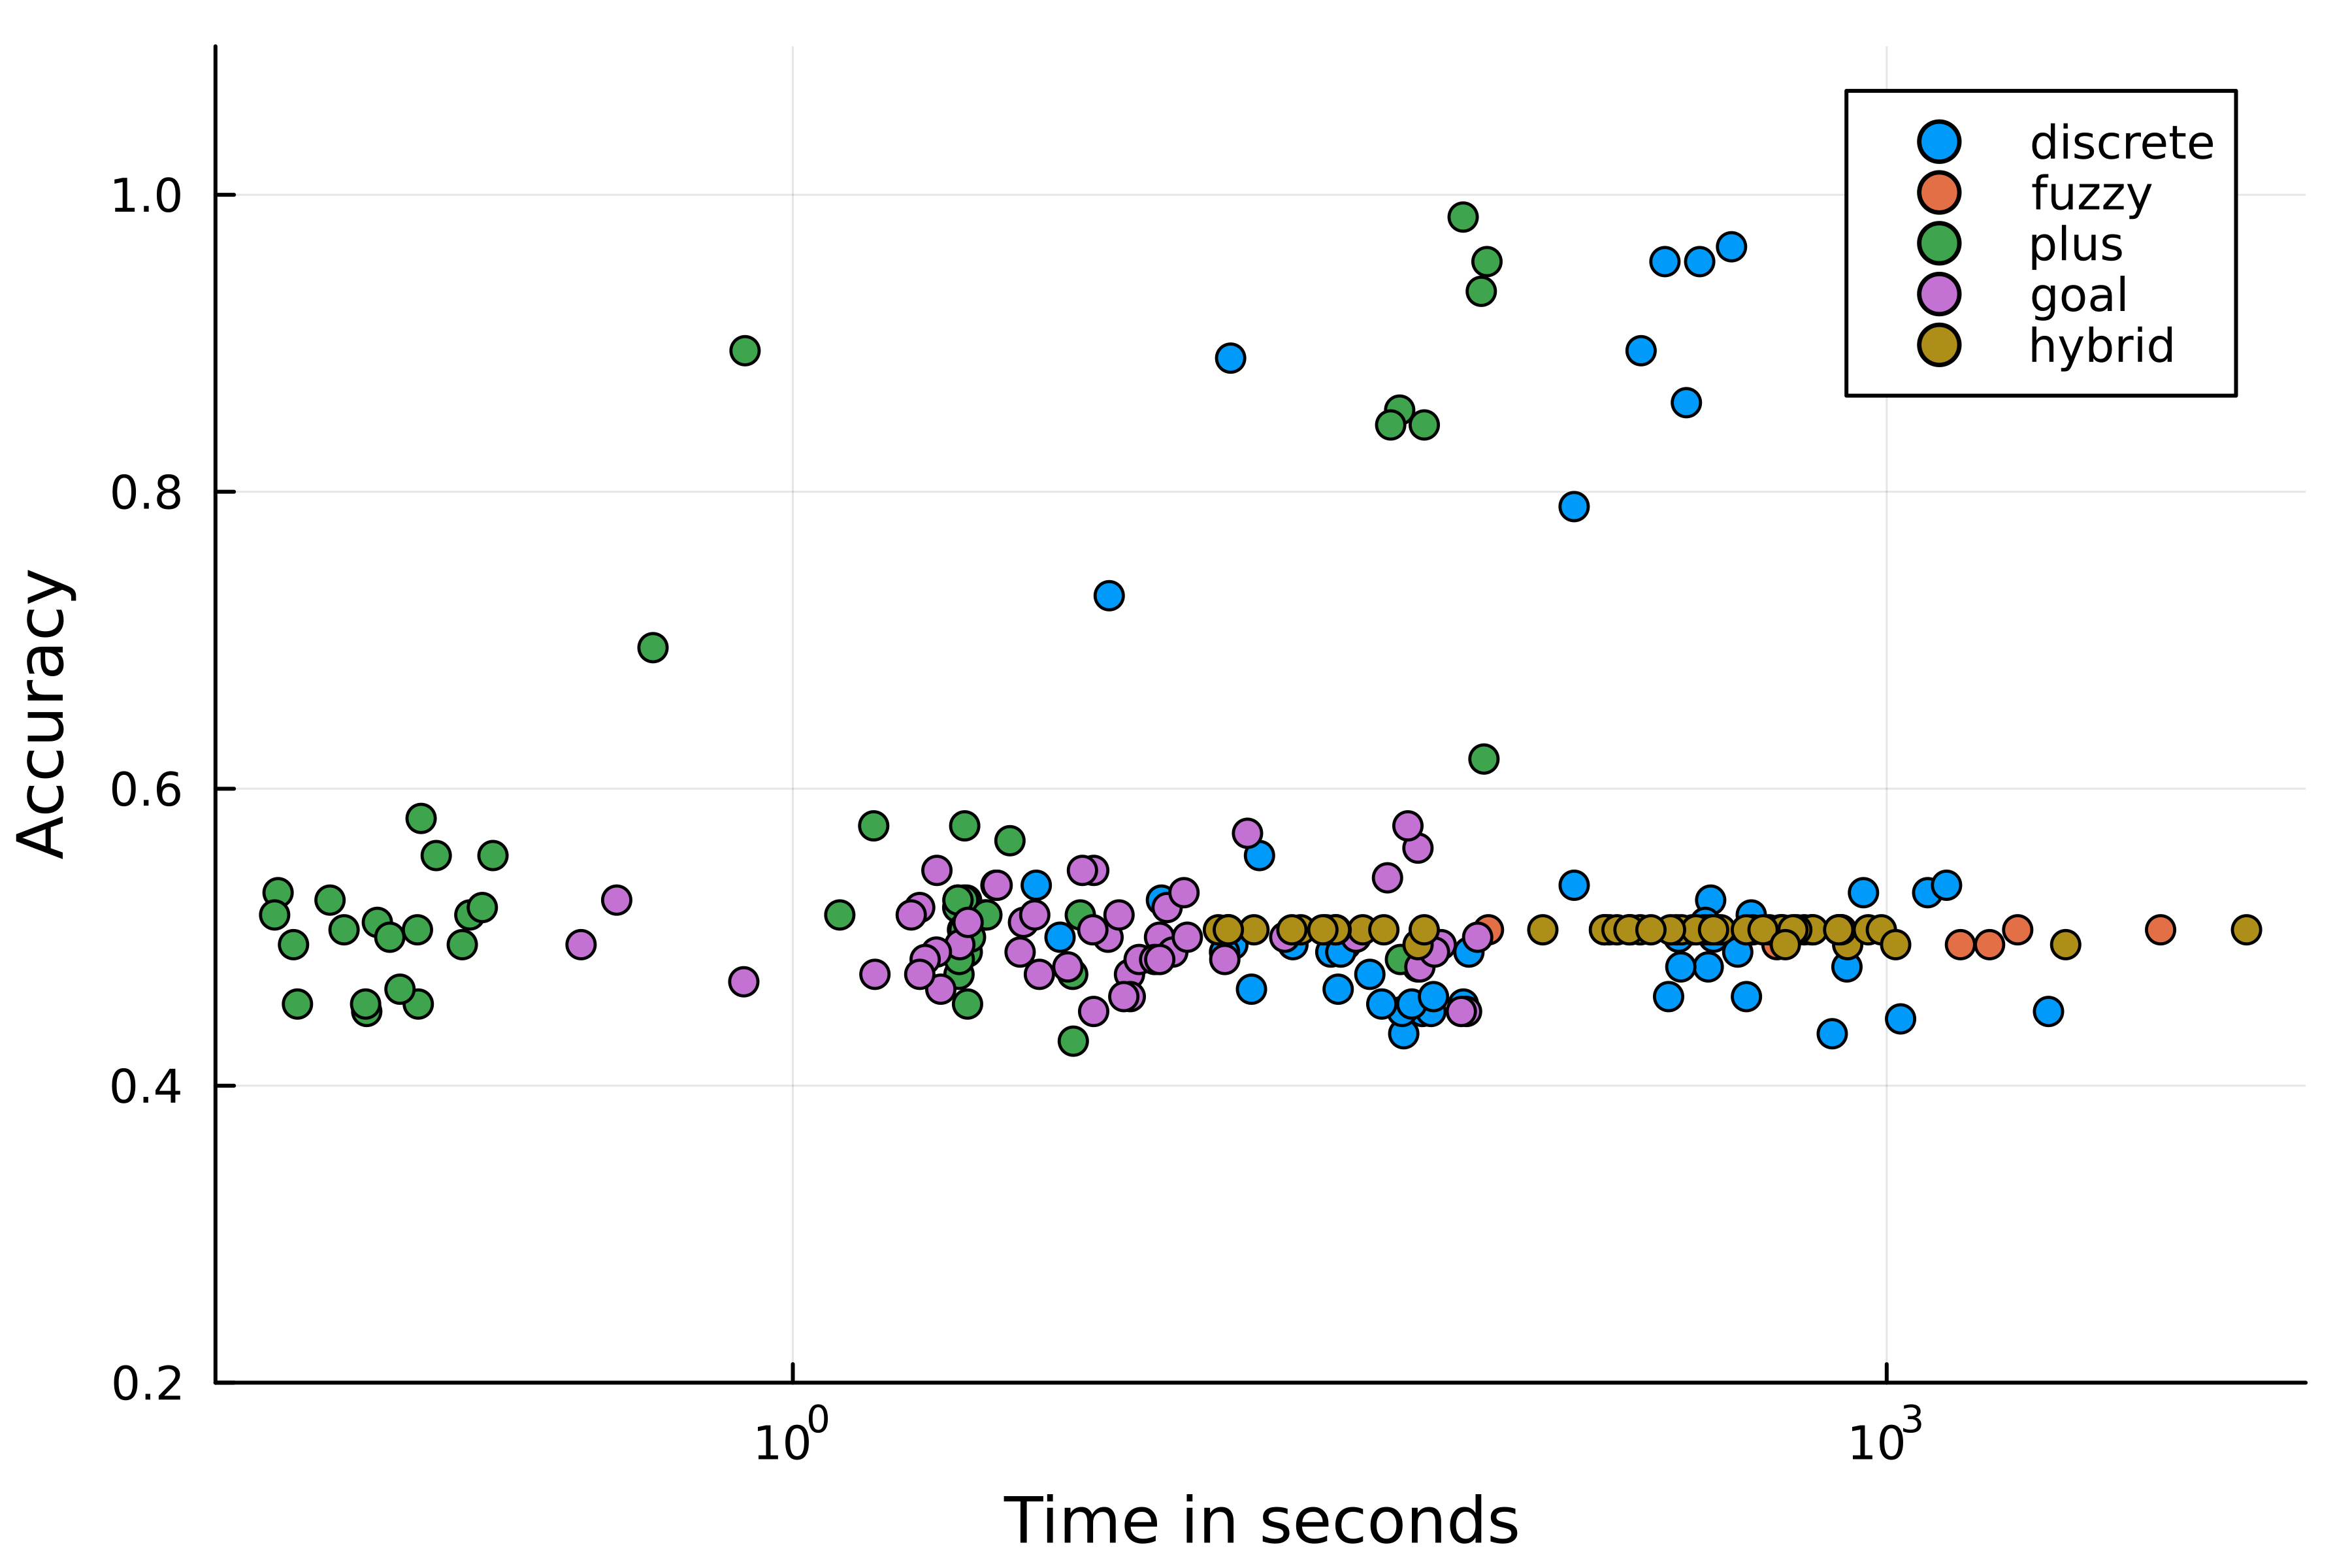

In [10]:
data = load_data("30_1000")
p = scatter(data["discrete"][2],data["discrete"][1],label="discrete",xlabel="Time in seconds",ylabel="Accuracy",ylim=(0.2,1.1),xaxis= :log,dpi=600)
scatter!(data["fuzzy"][2],data["fuzzy"][1],label="fuzzy")
scatter!(data["plus"][2],data["plus"][1],label="plus")
scatter!(data["goal"][2],data["goal"][1],label="goal")
scatter!(data["hybrid"][2],data["hybrid"][1],label="hybrid")
savefig(p,"plots/synth_30_1000.png")
p

In [72]:
function load_times_model_dataset(model,dataset)
    path, iter = paths[model][dataset]
    path = "exps/" * path
    init_time = zeros(iter)
    sstep = zeros(iter)
    gammastep = zeros(iter)
    wstep = zeros(iter)
    rstep = zeros(iter)
    lambdastep = zeros(iter)
    no_empty_cluster = zeros(iter)
    loss = zeros(iter)
    complete_time = zeros(iter)
    for i in 1:iter
        json_data = JSON.parsefile("$(path)/params_$i.json")
        complete_time[i] = json_data["complete_time"]
        init_time[i] = json_data["complete_time"] - json_data["opt_time"]
        if model == "discrete" || model == "plus"
            df = CSV.read("$(path)/opt_times_$i.csv",DataFrame)
            sstep[i] = sum(df[:,"sstep"])/1e9
            gammastep[i] = sum(df[:,"gammastep"])/1e9
            wstep[i] = sum(df[:,"wstep"])/1e9
            lambdastep[i] = sum(df[:,"lambdastep"])/1e9
            no_empty_cluster[i] = sum(df[:,"no_empty_cluster"])/1e9
            loss[i] = sum(df[:,"loss"])/1e9
        end
        if model == "fuzzy"
            df = CSV.read("$(path)/opt_times_$i.csv",DataFrame)
            sstep[i] = sum(df[:,"sstep"])/1e9
            gammastep[i] = sum(df[:,"gammastep"])/1e9
            wstep[i] = sum(df[:,"wstep"])/1e9
            lambdastep[i] = sum(df[:,"lambdastep"])/1e9
            loss[i] = sum(df[:,"loss"])/1e9
        end
        if model == "goal"
            df = CSV.read("$(path)/opt_times_$i.csv",DataFrame)
            sstep[i] = sum(df[:,"sstep"])/1e9
            gammastep[i] = sum(df[:,"gammastep"])/1e9
            rstep[i] = sum(df[:,"rstep"])/1e9
            lambdastep[i] = sum(df[:,"lambdastep"])/1e9
            no_empty_cluster[i] = sum(df[:,"no_empty_cluster"])/1e9
            loss[i] = sum(df[:,"loss"])/1e9
        end
    end
    if model == "discrete" || model == "plus"
        init_perc = init_time ./ complete_time * 100
        sstep_perc = sstep ./ complete_time * 100
        gammastep_perc = gammastep ./ complete_time * 100
        wstep_perc = wstep ./ complete_time * 100
        rstep_perc = 0.
        lambdastep_perc = lambdastep ./ complete_time * 100
        noc_perc = no_empty_cluster ./ complete_time * 100
        loss_perc = loss ./ complete_time * 100
        return mean(init_perc), mean(sstep_perc), mean(gammastep_perc), mean(wstep_perc), mean(rstep_perc) ,mean(lambdastep_perc), mean(noc_perc), mean(loss_perc)
    end
    if model == "goal"
        init_perc = init_time ./ complete_time * 100
        sstep_perc = sstep ./ complete_time * 100
        gammastep_perc = gammastep ./ complete_time * 100
        rstep_perc = rstep ./ complete_time * 100
        wstep_perc = 0
        lambdastep_perc = lambdastep ./ complete_time * 100
        noc_perc = no_empty_cluster ./ complete_time * 100
        loss_perc = loss ./ complete_time * 100
        return mean(init_perc), mean(sstep_perc), mean(gammastep_perc), mean(wstep_perc), mean(rstep_perc) ,mean(lambdastep_perc), mean(noc_perc), mean(loss_perc)
    end
    if model == "fuzzy"
        init_perc = init_time ./ complete_time * 100
        sstep_perc = sstep ./ complete_time * 100
        gammastep_perc = gammastep ./ complete_time * 100
        wstep_perc = wstep ./ complete_time * 100
        rstep_perc = 0.
        lambdastep_perc = lambdastep ./ complete_time * 100
        noc_perc = no_empty_cluster ./ complete_time * 100
        loss_perc = loss ./ complete_time * 100
        return mean(init_perc), mean(sstep_perc), mean(gammastep_perc), mean(wstep_perc), mean(rstep_perc) ,mean(lambdastep_perc), mean(noc_perc), mean(loss_perc)
    end
end

load_times_model_dataset (generic function with 1 method)

In [73]:
function show_times(dataset)
    println("discrete:", load_times_model_dataset("discrete",dataset))
    println("plus:", load_times_model_dataset("plus",dataset))
    println("fuzzy:", load_times_model_dataset("fuzzy",dataset))
    println("goal:", load_times_model_dataset("goal",dataset))

end

show_times (generic function with 1 method)

In [74]:
show_times("4_100")

discrete:(0.16457619516195332, 2.2009731219200854, 22.426020802007034, 71.50084830755151, 0.0, 0.46031030541648527, 0.9260075596225977, 1.2368481577932242)
plus:(1.1931308751939818, 5.6591497808494635, 66.21716528633516, 12.142099215963707, 0.0, 0.8828760741429444, 5.202916475536444, 4.15513281853446)
fuzzy:(0.008928650498758413, 6.723319811181923, 60.69011712542865, 10.319007071806263, 0.0, 22.191791937489196, 0.0, 0.048896883453442355)
goal:(0.5497807448197665, 5.876934331768517, 83.4771048813722, 0.0, 1.2708748161020094, 0.46137928418734686, 1.7215251271875087, 3.0866337555040544)


In [75]:
show_times("10_100")

discrete:(0.10436029556638825, 3.4920518518939296, 18.910576694034507, 74.67249812002012, 0.0, 0.4128822379594591, 0.7677007810477534, 0.8914449517423841)
plus:(1.6586954992368308, 10.873661901052603, 61.684620966031964, 13.439932836398235, 0.0, 0.7319941566359337, 5.0288196483300345, 3.141118903930011)
fuzzy:(0.0004386085692810885, 1.3424979735956557, 81.99308681620154, 2.1531175541804157, 0.0, 14.506696696259501, 0.0, 0.002414299984447943)
goal:(0.25751312461779136, 7.266760297629805, 86.0411902815555, 0.0, 1.1538642960453536, 0.3755612082559683, 0.7028706678508101, 2.0381608247958427)


In [76]:
show_times("30_100")

discrete:(0.07073533301733051, 3.6481201650542014, 9.172201250870703, 85.71021447861345, 0.0, 0.3853953015813058, 0.25747580670013887, 0.3961886994671915)
plus:(1.2609055717424875, 21.996975591706068, 51.33319637545008, 15.886000519009412, 0.0, 0.6120501677149999, 3.8829354819475834, 3.0683936265163094)
fuzzy:(0.0011896550057113086, 8.071386474712906, 64.46145340937319, 8.685337259750217, 0.0, 18.76973735619777, 0.0, 0.0068472110919972655)
goal:(0.12258020845297596, 8.948016950509746, 86.6966800435109, 0.0, 1.6315606237066178, 0.22746650217219438, 0.3821606912566371, 0.9355656001061294)


In [77]:
show_times("4_1000")

discrete:(0.028711994111481745, 2.935190321447638, 26.12726143912013, 67.92757088740923, 0.0, 0.39485250758855217, 1.433469364791999, 1.004011268040356)
plus:(0.3014007976809465, 4.771355863234718, 51.06696125301655, 38.68743929121522, 0.0, 0.43000130676556325, 1.7708415809636546, 2.541917327648414)
fuzzy:(0.0003930884641433912, 1.467708952161173, 68.87895095064557, 0.35559532450167514, 0.0, 29.293596817694628, 0.0, 0.0029966840271341113)
goal:(0.12907373982312056, 4.932168693086271, 89.91283274674898, 0.0, 0.4667351990144655, 0.2909102980022005, 1.107815556108975, 2.6828841550180607)


In [78]:
show_times("10_1000")

discrete:(0.02674112308949452, 2.1529888261385612, 7.537380309594912, 89.34671215012298, 0.0, 0.23354280525441912, 0.2862910195754681, 0.3464444251893805)
plus:(0.29135405317431656, 6.9690769358519855, 37.61372665306425, 51.23799233003778, 0.0, 0.4596774633645518, 1.383904551865927, 1.7186935578317053)
fuzzy:(0.000567036776662648, 0.6598852983465449, 96.89774957746069, 0.10793603970866451, 0.0, 2.3302772059578682, 0.0, 0.0030422511792149672)
goal:(0.05766660136972376, 6.577868271661398, 90.3968264626927, 0.0, 0.2850838898917349, 0.13084421036477756, 0.6110875836372739, 1.6118518927743275)


In [79]:
show_times("30_1000")

discrete:(0.001288122605886289, 0.6288754432277017, 0.7472648317692762, 98.28461919605834, 0.0, 0.009349374275108825, 0.05238406534598363, 0.2643237733244912)
plus:(0.11505847999675074, 4.854538273267239, 14.914369861719834, 77.44974938971585, 0.0, 0.18837542814517336, 0.24421756651216725, 2.078682248697072)
fuzzy:(0.001085882525013229, 8.804674110342543, 39.547638241050315, 26.927832970311403, 0.0, 24.580820622725657, 0.0, 0.13384234310144996)
goal:(0.013792153344440151, 9.897352461615998, 80.7754626962831, 0.0, 5.811390660228308, 0.03094513633807402, 0.18169254378845764, 3.1104771243187974)
